# Predicting Sale Prices for Aimes Iowa Housing Dataset

#### By: Matthew Malone: https://git.generalassemb.ly/mtm1186

## Problem Statement


The tech start up Willow Real Estate which is a online Real Estate Database company has been tasked by it's Investment Committee to provide a model that will be competetive with Zillow's Zestimate. Zillow's Zestimate is an automated valuation model that takes into account various home and neighborhood features that estimates home sales prices. The typical Zestimate error is $14, 000 (RMSE) according to online data. However, Zillow is an extremely large publically traded company and the investment committee has set a reasonable goal of a $25,000 error based off of Root Mean Squared Error (RMSE). Meeting this goal will be the first step before the Investment Committee provides more money to expand to new markets. 

## Executive Summary

The Investment Committee has viewed the midwest as an untapped market for Willow and has decided your first model should be built using housing data provided by the City of Ames, IA assessors office. This data is from 2006-2010 and has been used in computing assessed values for individual residenal properties sold in Ames. The data set is robust and is a comprehensive overview of a homes land and builidng features. It includes everything an appraiser would use when appraising the fair market value of a home. The data set will be sufficient in building a competetive model to rival Zillow's. Create a baseline model in additon to three other models (Linear Regression, Ridge, Lasso). Your goal is to achieve a RMSE score of $25,000 in predicted sales prices. Please keep in mind our goal is in prediction. 

## Table of Contents

#### Loading Data
#### EDA
#### Modeling
#### Baseline Model
#### Linear Regression
#### Ridge
#### Lasso
#### Model Selection
#### Model Evaluation
#### Conclusion
#### Recommendations


## Loading Data

In [1390]:
import warnings
warnings.filterwarnings("ignore") # Shhhh
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

RANDOM_STATE = 90210

In [1273]:
df_train = pd.read_csv('./datasets/train.csv') #called train.csv, but this IS our dataset 

In [1274]:
df_test = pd.read_csv('./datasets/test.csv')

In [1275]:
df_train.set_index('Id', inplace=True)
df_test.set_index('Id', inplace=True)

## EDA

In [1276]:
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [1277]:
df_test.head()


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [1278]:
# Look at the shape of our training data set
df_train.shape

(2051, 80)

In [1279]:
# validation data has one less column which is our target variable SalePrice. 
df_test.shape

(878, 79)

In [1280]:
#Summary Statistics for dataset
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PID,878.0,7.162867e+08,1.889103e+08,526302110.0,5.284841e+08,535454155.0,9.071904e+08,1.007100e+09
MS SubClass,878.0,5.826879e+01,4.223541e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,718.0,6.954596e+01,2.353394e+01,21.0,5.900000e+01,68.0,8.000000e+01,1.820000e+02
Lot Area,878.0,1.030703e+04,1.000267e+04,1477.0,7.297250e+03,9446.0,1.158900e+04,2.152450e+05
Overall Qual,878.0,6.050114e+00,1.369065e+00,2.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,878.0,5.566059e+00,1.128903e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,878.0,1.970492e+03,3.039589e+01,1880.0,1.954000e+03,1972.0,1.999750e+03,2.010000e+03
Year Remod/Add,878.0,1.984418e+03,2.045072e+01,1950.0,1.967000e+03,1992.0,2.003000e+03,2.010000e+03
Mas Vnr Area,877.0,1.062360e+02,1.871589e+02,0.0,0.000000e+00,0.0,1.720000e+02,1.378000e+03
BsmtFin SF 1,878.0,4.413280e+02,4.384573e+02,0.0,0.000000e+00,373.0,7.347500e+02,2.288000e+03


In [1281]:
df_train.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [1282]:
df_test.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [1283]:
df_train.dtypes

PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 80, dtype: object

In [1284]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [1285]:
df_train.isnull().sum().sum()

9822

In [1286]:
df_test.isnull().sum().sum()

4171

In [1288]:
#Referenced from https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
def missing_values_table(df):
        mis_val = df_train.isnull().sum()
        mis_val_percent = 100 * df_train.isnull().sum() / len(df_train)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df_train.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [1289]:
missing_values_table(df_train)

Your selected dataframe has 80 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Cond,114,5.6
Garage Qual,114,5.6
Garage Finish,114,5.6


In [1290]:
missing_values_table(df_test)

Your selected dataframe has 80 columns.
There are 26 columns that have missing values.


,Missing Values,% of Total Values
Pool QC,2042,99.6
Misc Feature,1986,96.8
Alley,1911,93.2
Fence,1651,80.5
Fireplace Qu,1000,48.8
Lot Frontage,330,16.1
Garage Yr Blt,114,5.6
Garage Cond,114,5.6
Garage Qual,114,5.6
Garage Finish,114,5.6


In [1291]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [1292]:
df_train.isnull().sum()[df_train.isnull().sum()>0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

In [1331]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Columns: 215 entries, PID to Bsmt Total Area
dtypes: float64(13), int64(35), object(14), uint8(153)
memory usage: 1.4+ MB


In [1293]:
#new dictionary has been created to fill null values in numerical columns with the mean average of that column.
#Ordinal values have been coded in descending order from best to least, with NaN values being assigned a 0 value. 
#Replacement dictionary was created in collaboration with Brandon Greenspan during project work time. 
new_dict = {
    'Alley' : {np.nan : 'none'},
    'Lot Frontage': {np.nan : df_train['Lot Frontage'].mean()},
    'Land Contour': {'Lvl' : 4, 'HLS' : 3, 'Bnk': 2, 'Low': 1},
    'Lot Config': {'Inside' : 4, 'Corner' : 3, 'CulDSac': 2, 'FR2': 1, 'FR2':0},
    'Lot Shape' : {'Reg' : 4, 'IR1' : 3, 'IR2': 2, 'IR3': 1},
    'Utilities': {'Allpub': 4, 'NoSewr' : 3, 'NoSewa' : 2, 'ELO': 1},
    'Bldg Type': {'1Fam' : 5, '2FmCon' : 4, 'Duplx': 3, 'TwnhsE': 2, 'TwnshI':1},
    'House Style': {'1Story' : 4, 'IR1' : 3, 'IR2': 2, 'IR3': 1},
    'Exter Qual': {'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'Land Slope': {'GT1': 3, 'Mod': 2, 'Sev': 1},
    'Mas Vnr Type' : {np.nan : 'none'},
    'Mas Vnr Area': {np.nan : 0},
    'Bsmt Qual': {'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, np.nan: 'none'},
    'Exter Cond':{'Ex': 5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1},
    'Bsmt Cond':{'Ex': 6, 'Gd': 5, 'TA': 4, 'Fa': 3, 'Po': 2, np.nan: 'none'},
    'Bsmt Exposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 'none'},
    'BsmftFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1, np.nan: 'none'},
    'Exter Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 'none'},
    'Exter Cond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 'none'},
    'BsmtFin Type 1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1, np.nan: 'none'},
    'BsmtFin Type 2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1, np.nan: 'none'},
    'Electrical': {'SBrkr':5, 'FuseA':4, 'FuseF':3, 'FuseP':2, 'Mix':1},
    'Kitchen Qual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1},
    'Functional': {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2':3, 'Sev':2, 'Sal':1},
    'Fireplace Qu':{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 'none'},
    'Garage Type':{'2Types': 5, 'Attchd': 4, 'Basment': 3, 'BuiltIn': 2, 'CarPort': 1, 'Detchd':0, np.nan: 'none'},
    'Garage Qual':{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 'none'},
    'Garage Cond':{'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 'none'},
    'Garage Finish':{'Fin':3, 'RFn':2, 'Unf':1, np.nan: 'none'},
    'Paved Drive': {'Y':3, 'P':2, 'N':1},
    'Pool QC': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 'No Pool'},
    'Fence':{'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, np.nan: 'none'},
    'BsmtFin SF 1':{np.nan : df_train['BsmtFin SF 1'].mean()},
    'BsmtFin SF 2':{np.nan : df_train['BsmtFin SF 2'].mean()},
    'Bsmt Unf SF':{np.nan : df_train['Bsmt Unf SF'].mean()},
    'Total Bsmt SF':{np.nan : df_train['Total Bsmt SF'].mean()},
    'Bsmt Full Bath':{np.nan : df_train['Bsmt Full Bath'].mean()},
    'Bsmt Half Bath':{np.nan : df_train['Bsmt Half Bath'].mean()},
    'Garage Yr Blt':{np.nan : {np.nan: df_train['Year Remod/Add']}},
    'Garage Cars':{np.nan : df_train['Garage Cars'].mean()},
    'Garage Area':{np.nan : df_train['Garage Area'].mean()},
    'Misc Feature': {np.nan: 'none'}
    
    
}
df_train = df_train.replace(new_dict)

In [1294]:
#check for total null values after imputing missing values 
df_train.isnull().sum()[df_train.isnull().sum()>0]

Series([], dtype: int64)

In [1295]:
df_test = df_test.replace(new_dict)

In [1296]:
df_test.shape

(878, 79)

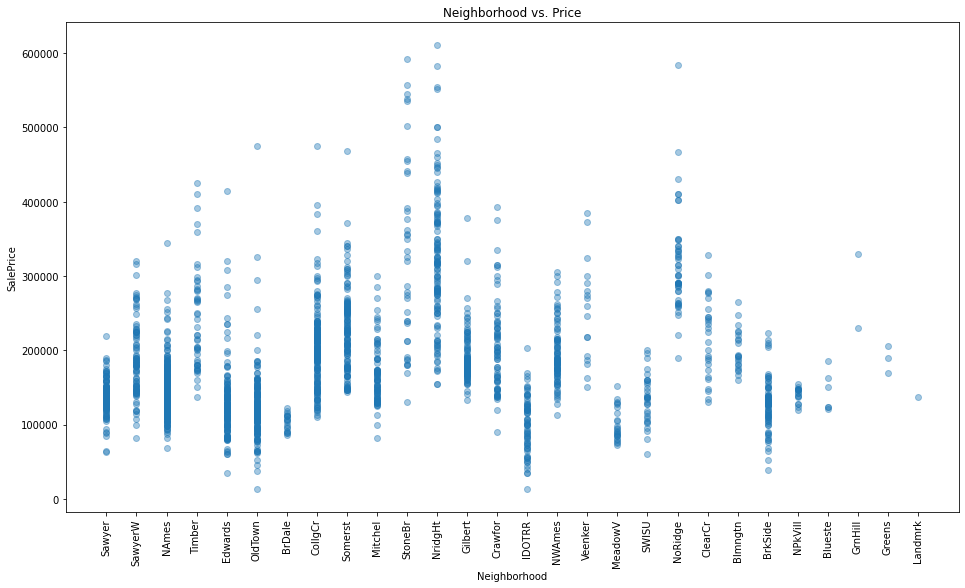

In [1297]:
#Identify neighborhoods in Ames that have a larger amount of high priced homes (+400,00). We are able to see from
# This scatter plot that 8 neighborhoods have all of the high priced homes. 
plt.figure(figsize =(16, 9))
plt.ylabel('SalePrice')
plt.xlabel('Neighborhood')
plt.title('Neighborhood vs. Price')
plt.scatter(x = df_train['Neighborhood'], 
            y = df_train['SalePrice'],
            alpha= 0.4)
plt.xticks(rotation=90);

In [1298]:
#One Hot Encoding, create dummy columns for categorical variables. 
df_train = pd.get_dummies(df_train, columns = [ 'Lot Config', 'Neighborhood', 
                                               'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                                               'Roof Style', 'Roof Matl', 'Mas Vnr Type',
                                               'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature',
                                               'MS Zoning', 'Street', 'Exterior 1st', 'Exterior 2nd', 'Foundation',
                                               'Bsmt Cond', 'Heating', 'Heating QC', 'Sale Type'
                                              ], drop_first = True)

In [1299]:
df_train.shape

(2051, 212)

In [1139]:
df_train.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Garage Type_2,Garage Type_3,Garage Type_4,Garage Type_5,Garage Type_none,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Misc Feature_none
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,RL,69.0552,13517,Pave,none,3,4,AllPub,...,0,0,1,0,0,0,0,0,0,1
544,531379050,60,RL,43.0000,11492,Pave,none,3,4,AllPub,...,0,0,1,0,0,0,0,0,0,1
153,535304180,20,RL,68.0000,7922,Pave,none,4,4,AllPub,...,0,0,0,0,0,0,0,0,0,1
318,916386060,60,RL,73.0000,9802,Pave,none,4,4,AllPub,...,1,0,0,0,0,0,0,0,0,1
255,906425045,50,RL,82.0000,14235,Pave,none,3,4,AllPub,...,0,0,0,0,0,0,0,0,0,1


In [1300]:
df_test = pd.get_dummies(df_test, columns = [ 'Lot Config', 'Neighborhood', 
                                               'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                                               'Roof Style', 'Roof Matl', 'Mas Vnr Type',
                                               'Foundation', 'Heating', 'Central Air', 'Garage Type', 'Misc Feature',
                                             'MS Zoning', 'Street', 'Exterior 1st', 'Exterior 2nd', 'Foundation',
                                               'Bsmt Cond', 'Heating', 'Heating QC', 'Sale Type'
                                            ], drop_first = True)

In [1301]:
df_test.shape

(878, 197)

In [1140]:
#df_train.head()
df_train.sort_values('SalePrice', ascending = False).head(10)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Garage Type_2,Garage Type_3,Garage Type_4,Garage Type_5,Garage Type_none,Misc Feature_Gar2,Misc Feature_Othr,Misc Feature_Shed,Misc Feature_TenC,Misc Feature_none
Id,,,,,,,,,,,,,,,,,,,,,
45,528150070,20,RL,100.0,12919,Pave,none,3,4,AllPub,...,0,0,1,0,0,0,0,0,0,1
1638,527216080,20,RL,52.0,51974,Pave,none,3,4,AllPub,...,0,0,1,0,0,0,0,0,0,1
2451,528360050,60,RL,114.0,17242,Pave,none,3,4,AllPub,...,0,0,1,0,0,0,0,0,0,1
434,528110090,60,RL,107.0,13891,Pave,none,4,4,AllPub,...,1,0,0,0,0,0,0,0,0,1
2333,527212030,60,RL,85.0,16056,Pave,none,3,4,AllPub,...,1,0,0,0,0,0,0,0,0,1
424,528106020,20,RL,105.0,15431,Pave,none,4,4,AllPub,...,0,0,1,0,0,0,0,0,0,1
457,528176030,20,RL,100.0,14836,Pave,none,3,3,AllPub,...,0,0,1,0,0,0,0,0,0,1
2331,527210040,60,RL,60.0,18062,Pave,none,3,3,AllPub,...,1,0,0,0,0,0,0,0,0,1
16,527216070,60,RL,47.0,53504,Pave,none,2,3,AllPub,...,1,0,0,0,0,0,0,0,0,1


In [1141]:
#Create a variable which includes the top ten correlated variables to our y-value of Sale Price. 
top_features = np.abs(df_train.corr()[['SalePrice']]).sort_values('SalePrice', ascending=False)

Text(0.5, 1.0, 'Top 10 Correlated Features to Sale Price')

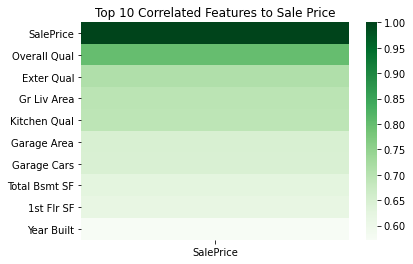

In [1142]:
sns.heatmap(top_features.head(10), cmap = 'Greens');
plt.title('Top 10 Correlated Features to Sale Price')

In [1417]:
#use .describe to get summary statistics on our target variable sales price
df_train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Sale Price Distribution in Ames')

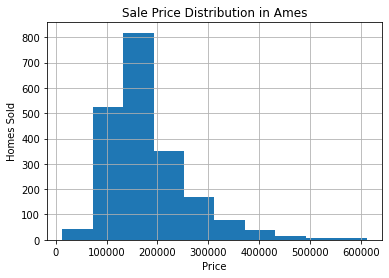

In [1143]:
df_train['SalePrice'].hist();
plt.xlabel('Price')
plt.ylabel('Homes Sold')
plt.title('Sale Price Distribution in Ames')

We observe the highest number of homes being purchased between $100,000 - $200,00 range. We observe outliers in the price range above $400,000. 

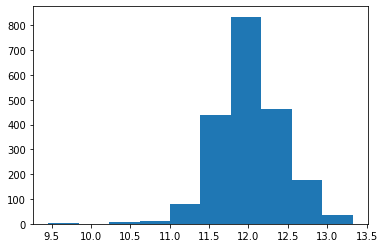

In [1144]:
#Because the Sale Prices are skewed and the presence of outliers, we have used np.log to create a more normal
#distribution. 
adjusted_SP = np.log(df_train.SalePrice)
plt.hist(adjusted_SP)

plt.show()

Text(0.5, 1.0, 'Sale Price Distribution in Ames')

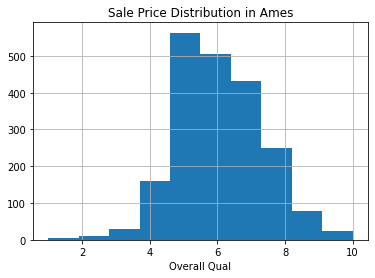

In [1145]:
df_train['Overall Qual'].hist();
plt.xlabel('Overall Qual')
plt.ylabel('')
plt.title('Sale Price Distribution in Ames')

In [1146]:
#Create pivot to be used in bar chart
pvt = df_train.pivot_table(index = 'Overall Qual',
                          values = 'SalePrice', aggfunc = np.mean)

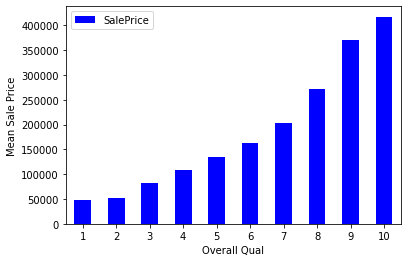

In [1147]:
#Create bar chart to show relationship between mean sale price and Overall Quality of homes
pvt.plot(kind = 'bar', color = 'blue')
plt.xlabel('Overall Qual')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation = 0)
plt.show();


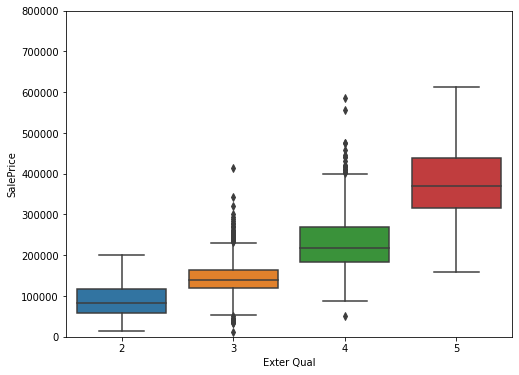

In [1414]:
#Create box plot to evaluate correlation between sale price and Exter Qual
var = 'Exter Qual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

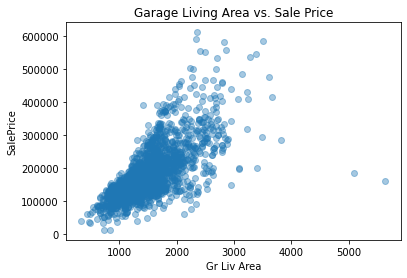

In [1394]:
#Create scatter plot to evaluate correlation between sale price and Gr Liv Area
plt.title('Garage Living Area vs. Sale Price')
plt.ylabel('SalePrice')
plt.xlabel('Gr Liv Area')
plt.scatter(x = df_train['Gr Liv Area'], 
            y = df_train['SalePrice'],
            alpha= 0.4);

In [1150]:
#remove outliers from data in attempt to increase model performance
df_train = df_train[df_train['Gr Liv Area'] < 4000]

Since we will be using RSME as our metric of choice to evalute are models it is important to eliminate outliers when we can. We have to be mindful of outliers in our data as they can heavily effect our metric. 

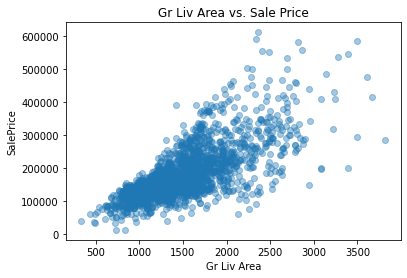

In [1151]:
plt.title('Gr Liv Area vs. Sale Price')
plt.ylabel('SalePrice')
plt.xlabel('Gr Liv Area')
plt.scatter(x = df_train['Gr Liv Area'], 
            y = df_train['SalePrice'],
            alpha= 0.4);

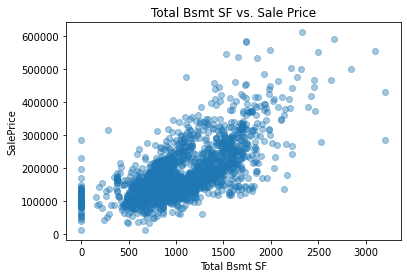

In [1152]:
#0 values for Bsmt SF most likely represent homes that do not have a basement. Outliers with large sq footage near
#the mean Sale Price of a home in Ames. 
plt.title('Total Bsmt SF vs. Sale Price')
plt.ylabel('SalePrice')
plt.xlabel('Total Bsmt SF')
plt.scatter(x = df_train['Total Bsmt SF'], 
            y = df_train['SalePrice'],
            alpha= 0.4);

In [1153]:
#Remove outliers in attempt to increase model performance 
df_train = df_train[df_train['Total Bsmt SF'] < 4000]

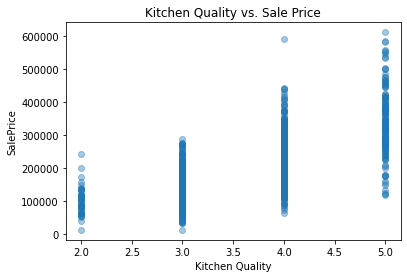

In [1154]:
# We observe an outlier in the category of Kitchen Quality of 4.0. A home in the highest sale price range (600,000)
#has a ktichen quality of 4.0. 
plt.title('Kitchen Quality vs. Sale Price')
plt.ylabel('SalePrice')
plt.xlabel('Kitchen Quality')
plt.scatter(x = df_train['Kitchen Qual'], 
            y = df_train['SalePrice'],
            alpha= 0.4);

FEATURE ENGINEERING

In [1302]:
#Feature Engineering adding up total square footage of a home 
df_train['Total Sq Ft'] = df_train['1st Flr SF'] + df_train['2nd Flr SF'] + df_train['BsmtFin SF 1'] + df_train['BsmtFin SF 2']

In [1303]:
df_test['Total Sq Ft'] = df_test['1st Flr SF'] + df_test['2nd Flr SF'] + df_test['BsmtFin SF 1'] + df_test['BsmtFin SF 2']

In [1304]:
#Adding number of full baths and half baths together to get total bathroom count 
df_train['Total Baths'] = df_train['Full Bath'] + (df_train['Half Bath'] * .5)

In [1305]:
df_test['Total Baths'] = df_test['Full Bath'] + (df_test['Half Bath'] * .5)

In [1306]:
df_train['Bsmt Total Area'] = df_train['Gr Liv Area'] + df_train['Total Bsmt SF']

In [1307]:
df_test['Bsmt Total Area'] = df_test['Gr Liv Area'] + df_test['Total Bsmt SF']

In [1308]:
#Create list of columns that were used during feature selection, These columns will be dropped in order to avoid
#multi-colinear features 
columns = ['1st Flr SF', '2nd Flr SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Full Bath', 'Half Bath', 'Bsmt Total Area',
          'Gr Liv Area', 'Total Bsmt SF']

In [1309]:
#drop columns from df to to remove multi-collinear features
df_train.drop(columns, axis = 1)

,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Overall Qual,...,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD,Total Sq Ft,Total Baths
Id,,,,,,,,,,,,,,,,,,,,,
109,533352170,60,69.0552,13517,none,3,4,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,2012.0,2.5
544,531379050,60,43.0000,11492,none,3,4,AllPub,Gtl,7,...,0,0,0,0,0,0,0,1,2759.0,2.5
153,535304180,20,68.0000,7922,none,4,4,AllPub,Gtl,5,...,0,0,0,0,0,0,0,1,1788.0,1.0
318,916386060,60,73.0000,9802,none,4,4,AllPub,Gtl,5,...,0,0,0,0,0,0,0,1,1444.0,2.5
255,906425045,50,82.0000,14235,none,3,4,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,1445.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1587,921126030,20,79.0000,11449,none,3,3,AllPub,Gtl,8,...,0,0,0,0,0,0,0,1,2739.0,2.0
785,905377130,30,69.0552,12342,none,3,4,AllPub,Gtl,4,...,0,0,0,0,0,0,0,1,1123.0,1.0
916,909253010,50,57.0000,7558,none,4,2,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,1913.0,1.5


In [1310]:
#drop columns from df to to remove multi-collinear features
df_test.drop(columns, axis = 1)

,PID,MS SubClass,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Overall Qual,...,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Total Sq Ft,Total Baths
Id,,,,,,,,,,,,,,,,,,,,,
2658,902301120,190,69.0000,9142,Grvl,4,4,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,1928,2.0
2718,905108090,90,69.0552,9662,none,3,4,AllPub,Gtl,5,...,0,0,0,0,0,0,0,1,1967,2.0
2414,528218130,60,58.0000,17104,none,3,4,AllPub,Gtl,7,...,0,0,0,0,1,0,0,0,2050,2.5
1989,902207150,30,60.0000,8520,none,4,4,AllPub,Gtl,5,...,0,0,0,0,0,0,0,1,968,1.0
625,535105100,20,69.0552,9500,none,3,4,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,2003,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,527377110,60,80.0000,8000,none,4,4,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,2961,2.5
1234,535126140,60,90.0000,14670,none,4,4,AllPub,Gtl,6,...,0,0,0,0,0,0,0,1,2563,2.5
1373,904100040,20,55.0000,8250,none,4,4,AllPub,Gtl,5,...,0,0,0,0,0,0,0,1,1953,1.0


In [1311]:
df_test.shape

(878, 200)

In [1312]:
df_test.columns.unique

<bound method Index.unique of Index(['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Alley', 'Lot Shape',
       'Land Contour', 'Utilities', 'Land Slope', 'Overall Qual',
       ...
       'Sale Type_ConLD', 'Sale Type_ConLI', 'Sale Type_ConLw',
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Total Sq Ft', 'Total Baths', 'Bsmt Total Area'],
      dtype='object', length=200)>

In [1313]:
df_train.shape

(2051, 215)

In [1259]:
list(df_train.columns) == list(df_test.columns)

False

### Model Preparation

In [980]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

## Modeling

In [1375]:
#Create list of features that will be used in our models
features = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Year Remod/Add', 'Total Sq Ft', 
           'Total Baths']
X = df_train[features]
y = df_train['SalePrice']

In [1376]:
#Train Test Split on our data 
X_train, X_test,y_train, y_test = train_test_split(X, y,
                                                  random_state = 42)

We split our data like this because testing data can represent "future" data for prediction-oriented models. It's critical to ensure that a model that is performing well on current data will likely perform well on future data. It also can help diagnose and avoid overfitting via model tuning. We do this in hopes to improve the quality of our predictions.

### Baseline Model

A baseline model has been created using the mean sale prices of our target variable Sale Price. This model provides a useful point of comparison for all future models used. Once we start getting results from other models our baseline can tell us if a change is adding value or if we need to include different features. It is a critical component of our modeling process. 

In [1363]:
#Instantiate baseline model for train and test data using for loop
y_train_baseline = [y_train.mean() for i in y_train]
y_test_baseline = [y_train.mean() for i in y_test]

In [1364]:
#Identify mean price of target variable Sale Price
Sale_Price_Avg = df_train['SalePrice'].mean()
Sale_Price_Avg

181469.70160897123

In [1365]:
#Using RMSE identify our results for baseline model 
print(mean_squared_error(y_train, y_train_baseline)**0.5)
print(mean_squared_error(y_test, y_test_baseline)**0.5)

79526.85223710592
78375.26238032707


## Linear Regression

In [1339]:
from sklearn.linear_model import LinearRegression


In [1377]:
model = LinearRegression()

In [1378]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1379]:
y_train_preds = model.predict(X_train)
y_test_preds = model.predict(X_test)

In [1380]:
#RMSE Metric used to evaluate performance of model 
print(mean_squared_error(y_train, y_train_preds)**0.5)
print(mean_squared_error(y_test, y_test_preds)**0.5)

37495.25939106669
31770.481333765765


Linear Regression Results-The above score is much better than the score of our baseline model. We are heading in the right direction and we know this because we can reference our baseline score. However, we are still a ways off from a target score of $25,000. Testing score is better than the training score. We have quite a ways to go to. We anticipate the two next models will perform better than Linear Regression. 

In [ ]:
plt.figure(figsize = (8,8))
plt.scatter()

In [1381]:
#Identify coefficients that have the greatest effect on our target variable
coef_df = pd.DataFrame({'name':X.columns, 'coeff':model.coef_})
coef_df.sort_values(by='coeff', ascending = False)


,name,coeff
0,Overall Qual,23301.169713
3,Garage Cars,9345.653756
4,Year Remod/Add,430.492225
2,Garage Area,27.884185
5,Total Sq Ft,26.433439
1,Gr Liv Area,21.555210
6,Total Baths,-990.919608


In [1392]:
#Cross validation score used to assess performance of model
cross_val_score(model, X_train, y_train, cv=5)

array([0.82054795, 0.80615101, 0.81308609, 0.76325609, 0.56550343])

In [1420]:
predictions = model.predict(X)

In [1421]:
residuals = y - predictions

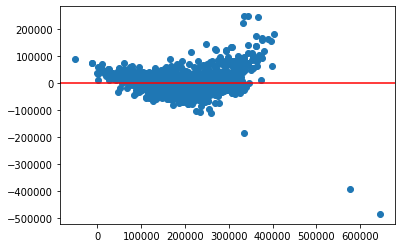

In [1423]:
# The y axis will be the residuals, and the x axis will be original predictions. Residuals plot shows that 
# some outliers were not handled correctly. These results is not exactly what we would like to see in a residual 
#plot. Also, scaling our data could have helped get better results in our residaul plot. 
plt.scatter(predictions, residuals)
plt.axhline(0, color='r');

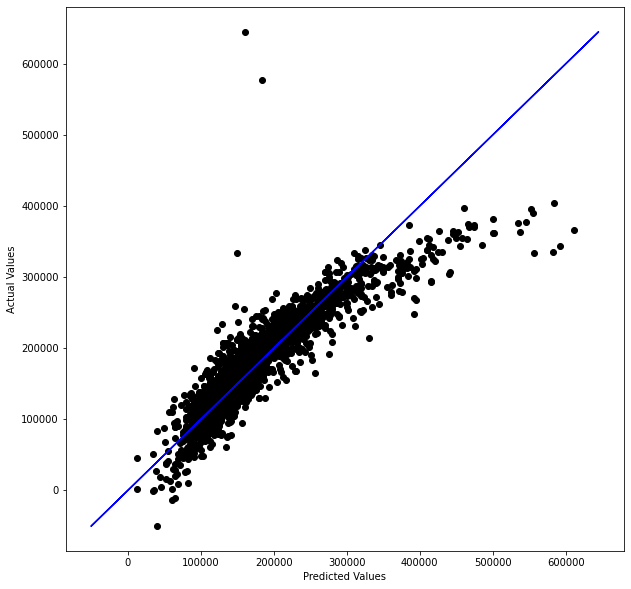

In [1429]:
#Scatterplot of predicted vs actual values 
plt.figure(figsize=(10,10))
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.scatter(y, predictions, c='k');

plt.plot(predictions, predictions, color='b');

We observe homoscedasticity up unti a certain point and then we observe our predicted values being further away from actural values as sale prices increase. This could be related to the outliers they were not addressed during EDA 

## Ridge

Ridge model shrinks our regression coefficients clsoer to zero to make our model simpler. We are accepting more bias in exchange for a decrease in variance. 

In [1353]:
#create variable for Sklearn StandardScaler to be used in Ridge and Lasso Models 
ss = StandardScaler()
#Fit Model 
ss.fit(X_train)
X_train_sc = ss.transform(X_train)

X_test_sc = ss.transform(X_test)

In [1354]:
ridge = RidgeCV(alphas = np.logspace(-6, 6, 10)) 
ridge.fit(X_train_sc, y_train)
train_pred = ridge.predict(X_train_sc)
test_pred = ridge.predict(X_test_sc)


In [1355]:
#Root Mean Squared Error used to evaluate the performance of our model
print(mean_squared_error(y_train, train_pred)**0.5)
print(mean_squared_error(y_test, test_pred)**0.5)

37574.40523994083
32101.05028842727


Ridge model does not perform better than Linear Regression model. We observe similar results, as once again the testing score is better than the training score. We can infer from these results that our model is most likely under fit. Our model falls short of capturing the complexity of the "true model" of the data.

In [1356]:
#Identify coefficients. Below values show that a one unit increase in these features leads to biggest expected
#increase in sale price (while all else is held constant).
coef_df = pd.DataFrame({'name':X.columns, 'coeff':ridge.coef_})
coef_df.sort_values(by='coeff', ascending = False)

,name,coeff
0,Overall Qual,30248.903047
5,Total Sq Ft,19382.044001
1,Gr Liv Area,11790.500602
4,Year Remod/Add,9501.938811
3,Garage Cars,7353.876318
2,Garage Area,7029.139146


In [1357]:
#Identifying our alpha that was generated when we ran our ridge model above. 
ridge.alpha_

100.0

In [1358]:
#Attempting to reproduce results based off the alpha generated by np.logspace
ridge = Ridge(alpha = 100) 
ridge.fit(X_train_sc, y_train)
train_pred = ridge.predict(X_train_sc)
test_pred = ridge.predict(X_test_sc)

In [1359]:
#RMSE results are the same as above. Testing our alpha here. 
print(mean_squared_error(y_train, train_pred)**0.5)
print(mean_squared_error(y_test, test_pred)**0.5)

37574.40523994049
32101.050288425628


## Lasso

In [1410]:
#Instantiate model
lasso = LassoCV(alphas = np.logspace(-6, 6, 10)) 
#Fit Model
lasso.fit(X_train_sc, y_train)
train_pred = lasso.predict(X_train_sc)
test_pred = lasso.predict(X_test_sc)

In [1411]:
#Root Mean Squared Error used to evaluate the performance of our model
print(mean_squared_error(y_train, train_pred)**0.5)
print(mean_squared_error(y_test, test_pred)**0.5)

37603.15292813838
32291.834943626753


In [1407]:
# Evaluate model using R2.
print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.7758650393211011
0.8354899414822097


R^2- coefficient of determination. We want tot get as closed to one as possible. What are above score tells us is for a R^2 value of .83 (testing data) is that 83% of the variability in y is explained by the X-variables in our model. 

In [1408]:
#Cross validation score used to assess performance of model
cross_val_score(lasso, X_train, y_train, cv =5 )

array([0.7617557 , 0.71924079, 0.74488202, 0.68345226, 0.43938891])

## Model Selection


Linear Regression Model gave us the best score for this data set based off of the metric R2 and RMSE. I Expected Linear Regresssion to perform the worst but it narrowly beat out Ridge & Lasso. This is the defacto choice there really is no best option and all of the models underperformed. 

## Model Evaluation

The Metric used to evaluate our modesl was root mean squared error (RMSE). This is the same metric we will be 
evaluated on when submitting our data to Kaggle. RMSE represents (approximately) average distance from the predicted value. It is heavily affected by outliers and we did observed this in our model results. 

The models were limited in their performance because of the number of features they included. The model was underfit and as result perfomed poorly. Our model fell short of capturing the complexity of the "true model" of the data. This was consistent across the Linear Regression, Ridge, and Lasso Models. Due to additional constraints we weren't able to get a model to run properly with all of the features initially created. If this had been done correctly better target scores would most likely been achieved. The metrics used to evaluate all three models were fairly close to one another. Lasso and Ridge would most likely outperformed the Linear Regression model but were limited due to the number of features. Our goal was focused on prediction not inference and we failed to accomplish that as our predictions were off a considerable amount from our target. 

## Conclusion

The target score the Investment Committee set for Willow Real Estate was not achieved. The Investment committee has decided to stop any addtional funding until it can produce better models that are closer to the target score (RMSE) of $25,000. Due to the fact that the models used lacked complexity and had so few features directly contributed to their poor performance. This stems from upstream issues related to EDA that limited what features could be used in the model. Only the features that were determined to be the highest correlated to sale price were used in the models. However, these features only provided limited information. There was much more out there and combining multiple variables through feature engineering could have been a powerful tool that helped us acheive better predictive scores. 

## Recommendations

Additonal investigation and manufacturing of features with linear relationships to the target will help increase model performance. Too few features were created through feature engineering. A deeper dive is required in EDA to identify trends and relationships. The data needs to be scaled appropriately, this was overlooked at times but is important to do. Inclued more features overall, use the "kitchen sink" approach, as we can always reduce the features to fine tune the models. The data was robust and a lot of it was not taken into consideration when addressing our problem statement. Take more time to formulate a plan and construct a framework to build off of and can be fine tuned. 

## References
https://www.washingtonpost.com/realestate/which-firm-has-more-accurate-online-estimates-for-homes-zillow-or-redfin/2019/02/19/7a1f6436-346b-11e9-a400-e481bf264fdc_story.html

# Kaggle Submission
Whatever you did to the first dataset, you MUST do to the validation/hold-out set

Data Set Submitted to Kaggle on 4/10/20

Validation data has been altered to reflect first dataset in cells 1295 & 1300

In [1415]:
#write to csv saved to output folder 
output.to_csv('./output/df_test.csv', index = False)

In [1416]:
#write to csv saved to output folder 
output.to_csv('./output/df_train.csv', index = False)